In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 1.59007726, -4.21801664],
       [ 0.51270907, -1.78366519],
       [-6.50116025,  4.79600823],
       ...,
       [ 8.10006425,  9.61500315],
       [-0.03702494, -0.72007267],
       [ 0.27558571, -2.69819895]])

In [4]:
y

array([2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0,
       1, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0,
       0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 2, 0,
       0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 2, 1, 1, 0, 2, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 2, 2,
       1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,

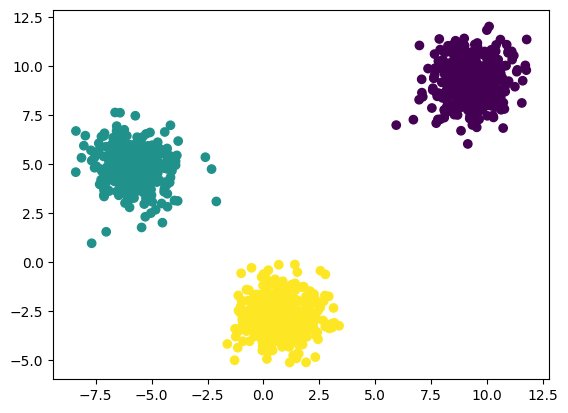

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
## standardization -- feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [10]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

In [18]:
## elbow method to select K value
wcss=[]
for k in range (1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train_scaled)
  wcss.append(kmeans.inertia_)

In [19]:
wcss

[1340.000000000001,
 413.8289015570778,
 42.18339081994445,
 35.7949496596096,
 33.762383209532025,
 25.364203161640045,
 23.15583146669818,
 20.5455315649565,
 19.017131793879525,
 17.006721431440457]

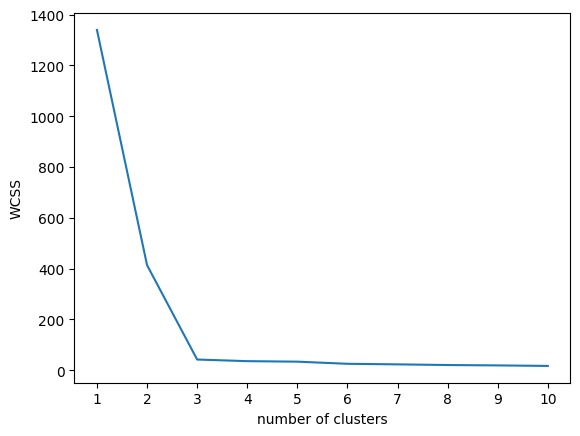

In [21]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [22]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [23]:
kmeans.fit_predict(X_train_scaled)

array([1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1,
       2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1,
       0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0,
       2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0,
       0, 2, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1,

In [25]:
y_pred=kmeans.predict(X_test_scaled)

In [26]:
y_pred

array([1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0,
       0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0,
       0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 0,
       1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 2,
       1, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0,
       1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 2,
       1, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0,

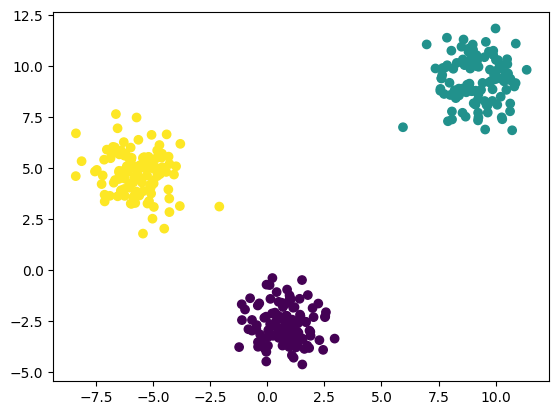

In [27]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [28]:
## validating the k value
## kneelocator
## silhoutee scoring

In [31]:
## kneelocator
!pip install kneed
from kneed import KneeLocator

In [32]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction="decreasing")

In [33]:
k1.elbow

np.int64(3)

In [34]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [40]:
silhouette_coefficients=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train_scaled)
  score=silhouette_score(X_train_scaled,kmeans.labels_)
  silhouette_coefficients.append(score)


In [41]:
silhouette_coefficients

[np.float64(0.6891709575976114),
 np.float64(0.8451710524754933),
 np.float64(0.6753024865865481),
 np.float64(0.5201281451323395),
 np.float64(0.4984883965476765),
 np.float64(0.3357928777701519),
 np.float64(0.34943032108886146),
 np.float64(0.3390571958963033),
 np.float64(0.339844691872085)]

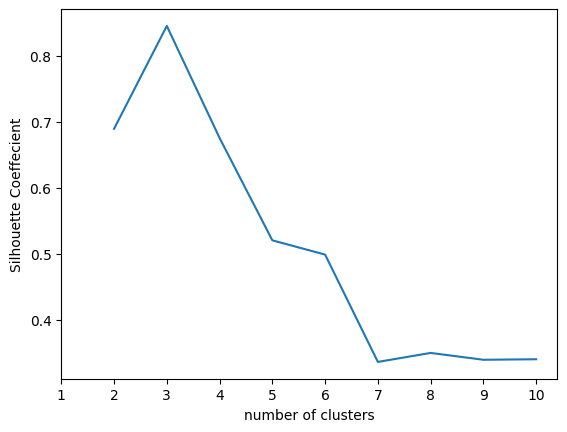

In [42]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("Silhouette Coeffecient")
plt.show()